In [1]:

!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-09-14 10:02:47--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0 [following]
--2024-09-14 10:02:49--  https://www.dropbox.com/scl/fi/ied22o8pntppl24qr84vy/dataset.zip?rlkey=9e4cnwq83zhgrhw1g0zrkw275&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb2950d8e7a12dbe71b2a6e2f9d.dl.dropboxusercontent.com/cd/0/inline/Caggz6MvBsNWEFbs0aPqvbxCU-6zD_bfOwcfBXDcSNN-XIN7i-Fbpig38_gOyvseeBbLwU2nOCBXVQUKRin8RvbeZ-gu4CJ2KCQyrluouUewM_LbiKZ_xPPMdbarbzdJpnI1GcjFf0ehWOx5OgXVpaoe/file# [following]
--2024-09-14 10:02:50--  https://ucb2950d8e7a12dbe71b2a6e2f9d.dl.dropboxusercontent.co

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [5]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [7]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


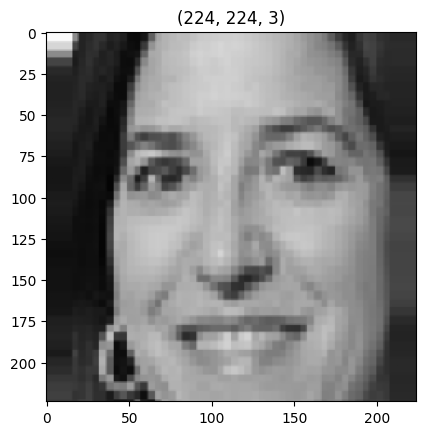

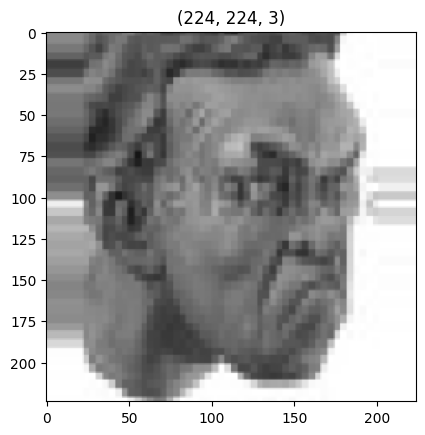

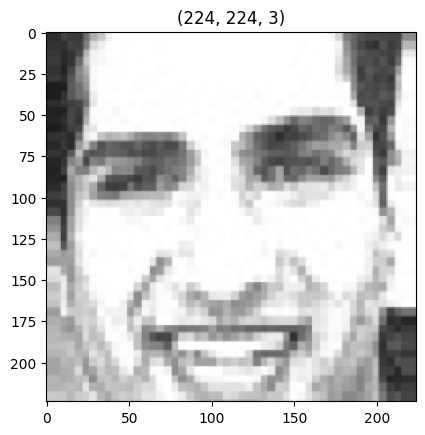

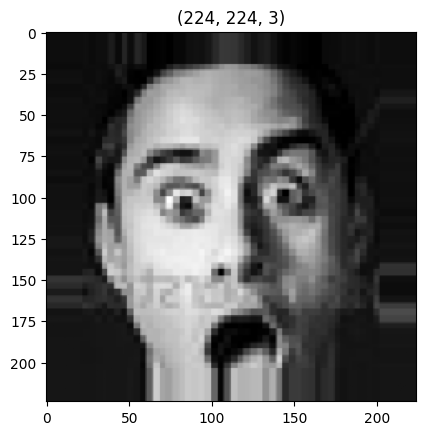

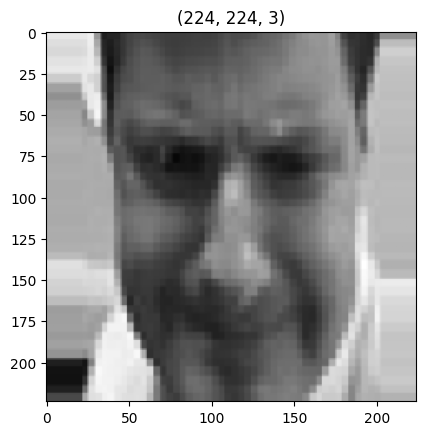

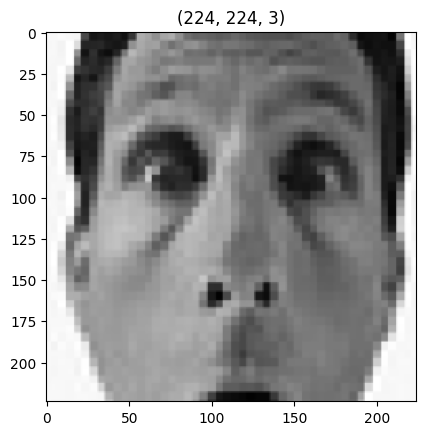

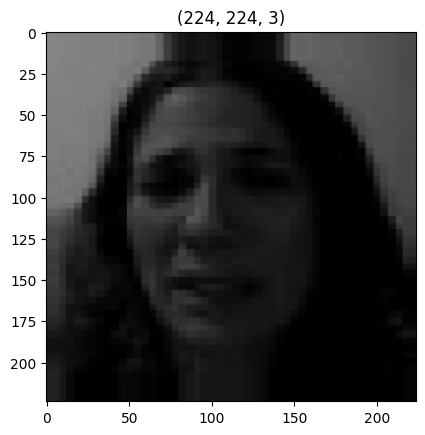

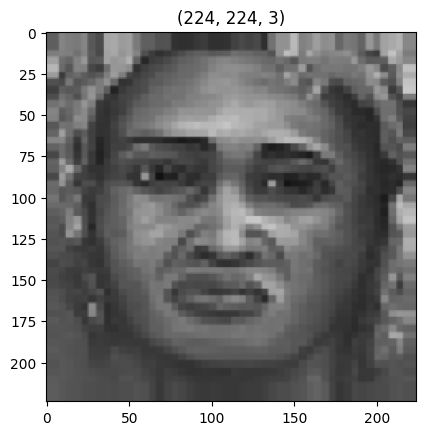

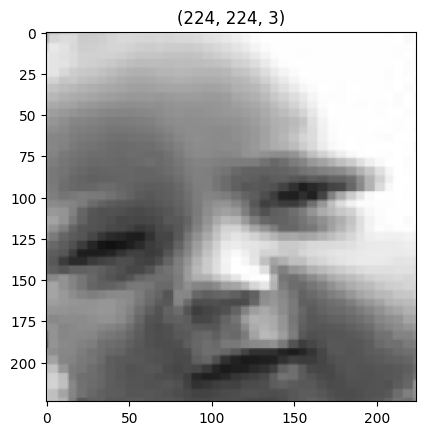

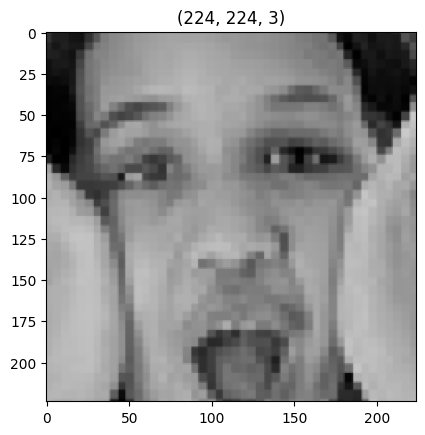

In [9]:
# to visualize the images in the traing data denerator

t_img , label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will plot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [10]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [11]:
hist = model.fit(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1924 - loss: 12.7600
Epoch 1: val_accuracy improved from -inf to 0.32422, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.1936 - loss: 12.9708 - val_accuracy: 0.3242 - val_loss: 7.2294
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3360 - loss: 8.8405
Epoch 2: val_accuracy improved from 0.32422 to 0.33594, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.3367 - loss: 8.8466 - val_accuracy: 0.3359 - val_loss: 7.5213
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3455 - loss: 7.1058
Epoch 3: val_accuracy did not improve from 0.33594
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.3456 - loss: 7.0745 - val_accuracy: 0.3203 - val_loss: 7.2558
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3464 - loss: 7.4978
Epoch 4: val_accuracy improved from 0.33594 to 0.37891, saving model to best_model.keras
10/10 ━━━━━━━━━━━

In [12]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [13]:

h =  hist.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

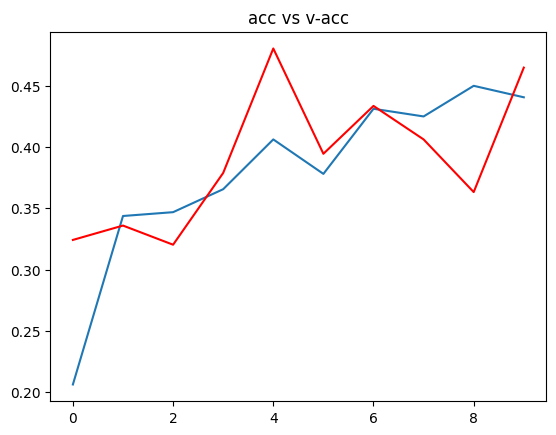

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

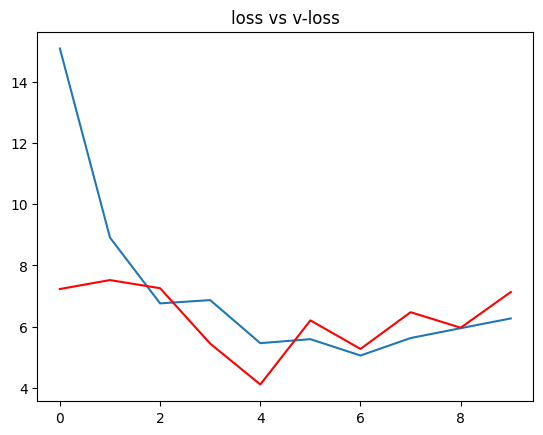

In [15]:

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:

# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
 The face expression of this image is happy


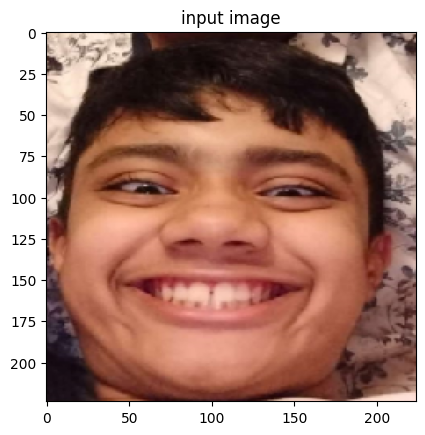

In [20]:

# path for the image to see if it predics correct class

path = "labibsmilling.png"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The face expression of this image is {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()